# **Capstone-1**


---

⚛
Anish.V.Karanth



⚛
anish.karanth@gmail.com

# Import all Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, pearsonr, spearmanr

#Download and read dataset

In [2]:
male_url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv"
female_url = "https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv"

male = np.genfromtxt(male_url, delimiter=",", skip_header=1, dtype=float)
female = np.genfromtxt(female_url, delimiter=",", skip_header=1, dtype=float)


print(f"Male data shape: {male.shape}")
print(f"Female data shape: {female.shape}")

Male data shape: (4082, 7)
Female data shape: (4222, 7)


#Compare the weight distributions of male and female participants

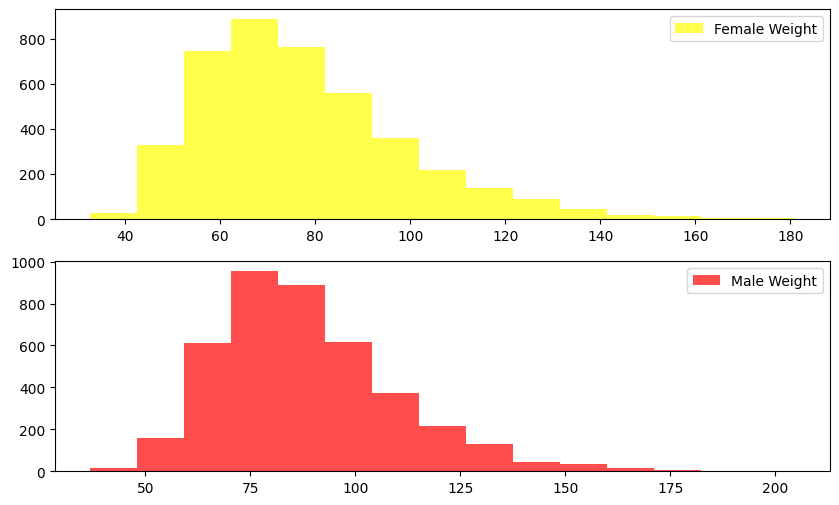

In [3]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(female[:, 0], bins=15, alpha=0.7, color='yellow', label='Female Weight')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(male[:, 0], bins=15, alpha=0.7, color='red', label='Male Weight')
plt.legend()
plt.show()

# Plot Histograms of Weights

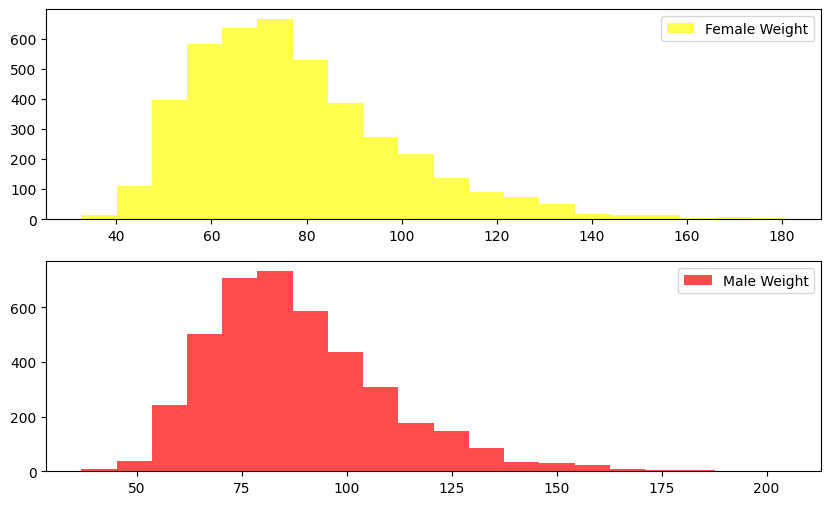

In [4]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(female[:, 0], bins=20, alpha=0.7, color='yellow', label='Female Weight')
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(male[:, 0], bins=20, alpha=0.7, color='red', label='Male Weight')
plt.legend()
plt.show()

# Check for NaN or invalid values

In [5]:
print("Male dataset preview:\n", male[:5])
print("Female dataset preview:\n", female[:5])
print("Any NaNs in Male Data:", np.isnan(male).any())
print("Any NaNs in Female Data:", np.isnan(female).any())

Male dataset preview:
 [[  nan   nan   nan   nan   nan   nan   nan]
 [ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]]
Female dataset preview:
 [[  nan   nan   nan   nan   nan   nan   nan]
 [ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]]
Any NaNs in Male Data: True
Any NaNs in Female Data: True


#Remove NaN data

In [6]:
male = male[~np.isnan(male).any(axis=1)]
female = female[~np.isnan(female).any(axis=1)]

#Checking Data post clearing

In [7]:
print("Male dataset preview:\n", male[:5])
print("Female dataset preview:\n", female[:5])

print("Any NaNs in Male Data:", np.isnan(male).any())
print("Any NaNs in Female Data:", np.isnan(female).any())

Male dataset preview:
 [[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]
Female dataset preview:
 [[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]
Any NaNs in Male Data: False
Any NaNs in Female Data: False


# Boxplot for Weight Comparison

<ipython-input-8-5fd59ffc8dc8>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female[:, 0], male[:, 0]], labels=['Female', 'Male'])


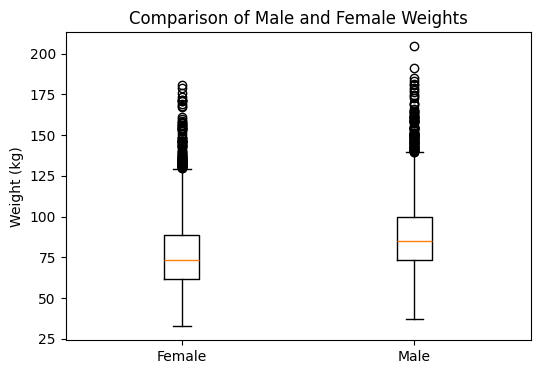

In [8]:
plt.figure(figsize=(6, 4))
plt.boxplot([female[:, 0], male[:, 0]], labels=['Female', 'Male'])
plt.ylabel("Weight (kg)")
plt.title("Comparison of Male and Female Weights")
plt.show()

#Compute Basic Numerical Aggregates

In [9]:
def describe_data(data, label):
    print(f"Statistics for {label}:")
    print(f"Mean: {np.mean(data):.2f}, Median: {np.median(data):.2f}")
    print(f"Standard Deviation: {np.std(data):.2f}")
    print(f"Min: {np.min(data)}, Max: {np.max(data)}")
    print("-----------")

describe_data(female[:, 0], "Female Weights")
describe_data(male[:, 0], "Male Weights")

Statistics for Female Weights:
Mean: 77.40, Median: 73.60
Standard Deviation: 21.54
Min: 32.6, Max: 180.9
-----------
Statistics for Male Weights:
Mean: 88.36, Median: 85.00
Standard Deviation: 21.42
Min: 36.8, Max: 204.6
-----------


#Compute and Append BMI

In [10]:

def compute_bmi(data):
    weight = data[:, 0]
    height_m = data[:, 1] / 100
    bmi = weight / (height_m ** 2)
    return np.column_stack((data, bmi))

female = compute_bmi(female)
male = compute_bmi(male)


#Standardize Female Data

In [11]:

zfemale = np.apply_along_axis(zscore, 0, female)


#Scatterplot Matrix and Correlations

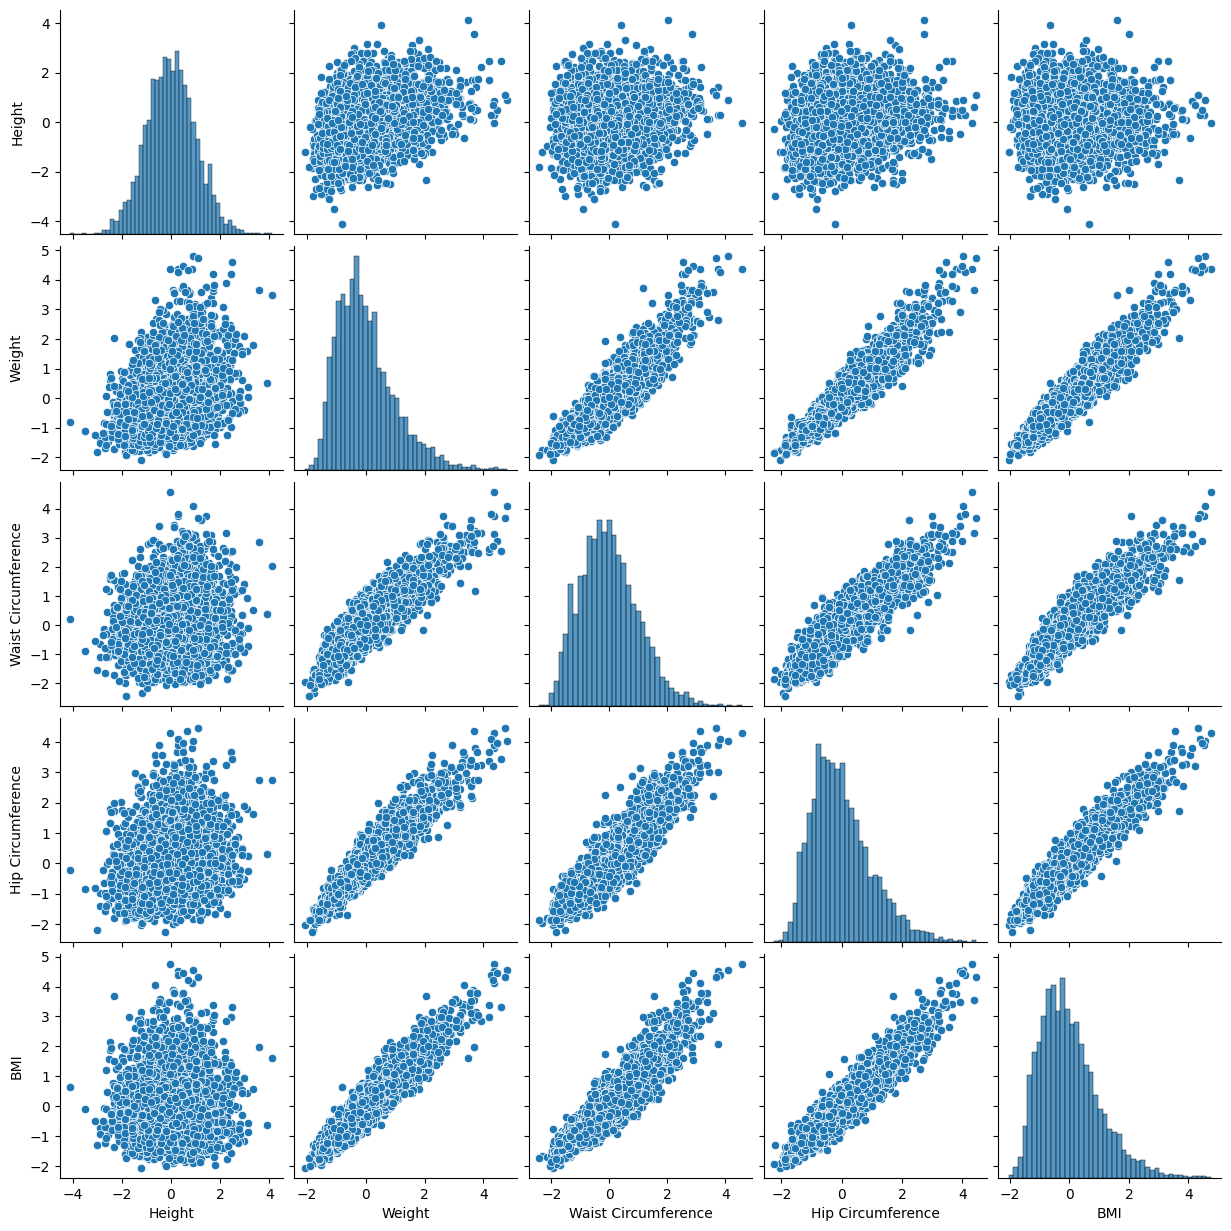

Pearson(Weight, Height): 0.35, Spearman: 0.34
Pearson(Weight, Arm Length): 0.55, Spearman: 0.54
Pearson(Weight, Leg Length): 0.19, Spearman: 0.20
Pearson(Weight, Arm Circumference): 0.91, Spearman: 0.91
Pearson(Weight, Hip Circumference): 0.95, Spearman: 0.95
Pearson(Weight, Waist Circumference): 0.90, Spearman: 0.90
Pearson(Weight, BMI): 0.95, Spearman: 0.94
Pearson(Height, Weight): 0.35, Spearman: 0.34
Pearson(Height, Arm Length): 0.67, Spearman: 0.67
Pearson(Height, Leg Length): 0.66, Spearman: 0.65
Pearson(Height, Arm Circumference): 0.15, Spearman: 0.14
Pearson(Height, Hip Circumference): 0.20, Spearman: 0.21
Pearson(Height, Waist Circumference): 0.13, Spearman: 0.11
Pearson(Height, BMI): 0.03, Spearman: 0.02
Pearson(Arm Length, Weight): 0.55, Spearman: 0.54
Pearson(Arm Length, Height): 0.67, Spearman: 0.67
Pearson(Arm Length, Leg Length): 0.48, Spearman: 0.46
Pearson(Arm Length, Arm Circumference): 0.45, Spearman: 0.42
Pearson(Arm Length, Hip Circumference): 0.46, Spearman: 0.45


In [12]:

df_zfemale = pd.DataFrame(zfemale, columns=["Weight", "Height", "Arm Length", "Leg Length", "Arm Circumference", "Hip Circumference", "Waist Circumference", "BMI"])
sns.pairplot(df_zfemale[["Height", "Weight", "Waist Circumference", "Hip Circumference", "BMI"]])
plt.show()


for col1 in df_zfemale.columns:
    for col2 in df_zfemale.columns:
        if col1 != col2:
            pearson_corr, _ = pearsonr(df_zfemale[col1], df_zfemale[col2])
            spearman_corr, _ = spearmanr(df_zfemale[col1], df_zfemale[col2])
            print(f"Pearson({col1}, {col2}): {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}")


#Compute Waist-to-Height and Waist-to-Hip Ratios

In [13]:
# ## **9. Compute Waist-to-Height and Waist-to-Hip Ratios**
def compute_ratios(data):
    waist_to_height = data[:, 6] / data[:, 1]
    waist_to_hip = data[:, 6] / data[:, 5]
    return np.column_stack((data, waist_to_height, waist_to_hip))

female = compute_ratios(female)
male = compute_ratios(male)


#Boxplot Comparison of Ratios

<ipython-input-14-5bc17ca983c8>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female[:, 8], male[:, 8], female[:, 9], male[:, 9]],


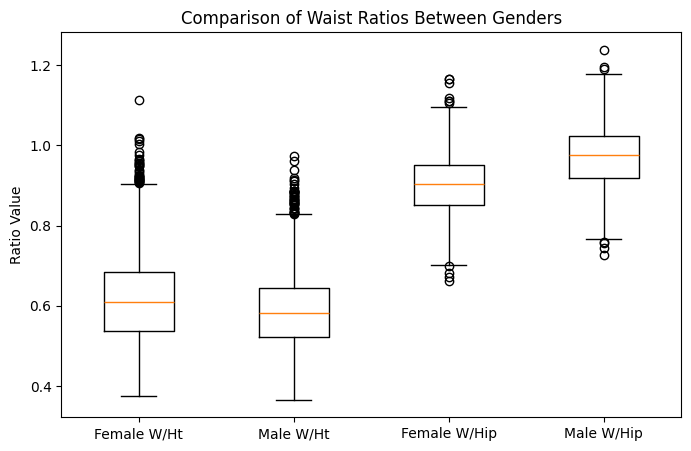

In [14]:
# ## **10. Boxplot Comparison of Ratios**
plt.figure(figsize=(8, 5))
plt.boxplot([female[:, 8], male[:, 8], female[:, 9], male[:, 9]],
            labels=['Female W/Ht', 'Male W/Ht', 'Female W/Hip', 'Male W/Hip'])
plt.ylabel("Ratio Value")
plt.title("Comparison of Waist Ratios Between Genders")
plt.show()


# **11. Discussion on BMI, Waist-to-Height, and Waist-to-Hip Ratios**
# **Advantages and Disadvantages:**
# - **BMI:** Easy to calculate but doesn't distinguish between fat and muscle mass.
# - **Waist-to-Height Ratio:** More accurate for assessing health risks related to fat distribution.
# - **Waist-to-Hip Ratio:** Indicates fat distribution but may not be accurate for all body types.

# **12. Find Individuals with Extreme BMI**

In [15]:
# ## **12. Find Individuals with Extreme BMI**
bmi_sorted_indices = np.argsort(female[:, 7])  # Use the original BMI values
lowest_bmi = female[bmi_sorted_indices[:5]]
highest_bmi = female[bmi_sorted_indices[-5:]]

print("5 Individuals with Lowest BMI:\n", lowest_bmi)
print("5 Individuals with Highest BMI:\n", highest_bmi)


5 Individuals with Lowest BMI:
 [[ 32.6        151.5         32.4         33.4         20.4
   77.3         64.7         14.20340054   0.42706271   0.83699871]
 [ 36.9        158.8         32.          38.4         19.
   80.2         62.7         14.63273036   0.39483627   0.78179551]
 [ 44.3        172.9         37.5         39.          20.
   83.          68.8         14.81882399   0.39791787   0.82891566]
 [ 37.7        158.3         35.5         38.8         19.8
   74.          66.2         15.04456103   0.4181933    0.89459459]
 [ 42.7        166.4         35.8         38.7         20.3
   80.6         68.7         15.42130871   0.41286058   0.85235732]]
5 Individuals with Highest BMI:
 [[168.9        162.2         40.4         34.          46.
  173.3        164.9         64.19895366   1.01664612   0.95152914]
 [173.4        163.7         40.          33.5         51.5
  171.4        149.          64.7070699    0.91020159   0.86931155]
 [171.1        162.1         42.7        